In [170]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [148]:
dt_prin = pd.read_csv('CC GENERAL.csv')
dt_prin.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [149]:
dt= dt_prin.copy()
dt.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [150]:
dt.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

<p>
CUST_ID :  identification du titulaire de la carte de crédit (catégoriel)

BALANCE :  montant du solde restant sur leur compte pour effectuer des achats
    (BALANCE_FREQUENCY : fréquence de mise à jour du solde, score compris entre 0 et 1 (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour)) 

ACHATS :  Montant des achats effectués depuis le compte

ONEOFF_PURCHASES :  montant maximum d'achat effectué en une seule fois

 INSTALLMENTS_PURCHASES :  montant de l'achat effectué en plusieurs fois

 CASH_ADVANCE :  Paiement d'avance donné par l'utilisateur

PURCHASES_FREQUENCY :  fréquence des achats, score compris entre 0 et 1 (1 = achats fréquents, 0 = achats peu fréquents)

 ONEOFFPURCHASESFREQUENCY :  fréquence des achats simultanés (1 = achats fréquents, 0 = achats peu fréquents)

 PURCHASESINSTALLMENTSFREQUENCY :  la fréquence des achats en plusieurs fois (1 = fréquemment effectués, 0 = peu fréquents)

CASHADVANCEFREQUENCY : fréquence de versement de l'avance en espèces 

CASHADVANCETRX : Nombre de transactions effectuées avec "Cash in Advance"  PURCHASES_TRX : Nombre de transactions d'achat effectuées

 CREDIT_LIMIT : Limite de carte de crédit pour l'utilisateur 
    
    PAYMENTS : montant du paiement effectué par l'utilisateur
    
    MINIMUM_PAYMENTS : montant minimum des paiements effectués par l'utilisateur 
    
    PRCFULLPAYMENT : pourcentage du paiement total payé par l'utilisateur
    
    TENURE : durée du service de carte de crédit pour l'utilisateur
</p>

In [151]:
dt.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<h1>ANALYSE ET PRETRAITEMENT DES DONNEES</h1>

In [152]:
dt.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [154]:
dt['MINIMUM_PAYMENTS'] = dt['MINIMUM_PAYMENTS'].fillna(dt['MINIMUM_PAYMENTS'].mean()) 
dt.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [155]:
dt.dropna(inplace=True)

In [156]:
dt.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [157]:
dt.duplicated().sum()

0

In [158]:
dt.drop(['CUST_ID'],axis=1,inplace=True)
dt.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [159]:
modelAgglo = AgglomerativeClustering(n_clusters=5 , affinity='euclidean',linkage='complete')
clust_labels=modelAgglo.fit_predict(dt)

In [160]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8944,0
8945,0
8946,0
8947,0


<AxesSubplot:>

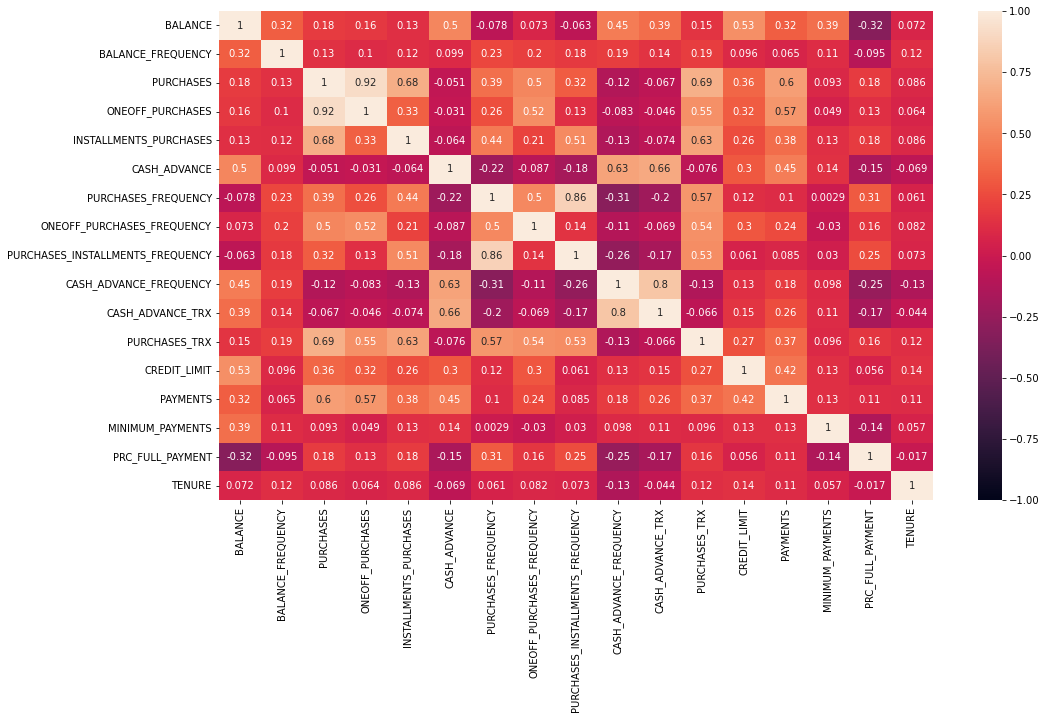

In [161]:
plt.figure(figsize=(16,9))
sns.heatmap(dt.corr(),vmin=-1,vmax=1,annot=True)

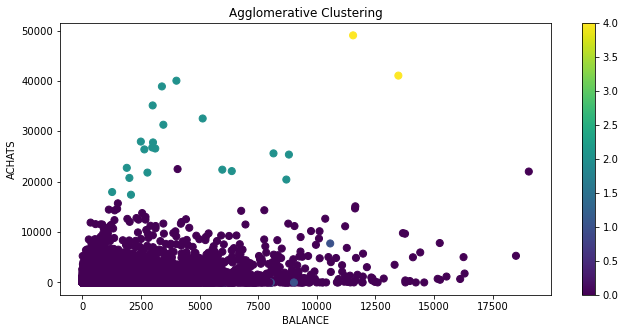

In [162]:
fig =plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)
scatter = ax.scatter (dt['BALANCE'] , dt["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("ACHATS")
plt.colorbar(scatter)

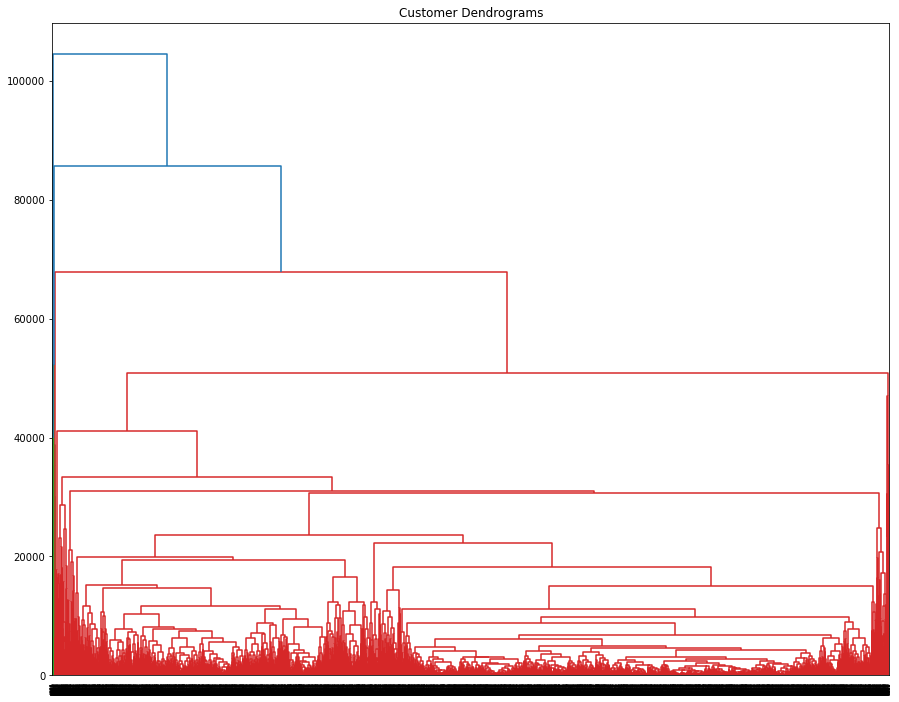

In [163]:
plt.figure(figsize=(15,12))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(dt, method="complete"))

In [186]:
SSE = []
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km= km.fit(dt)
    SSE.append(km.inertia_)

Text(0, 0.5, 'SSE')

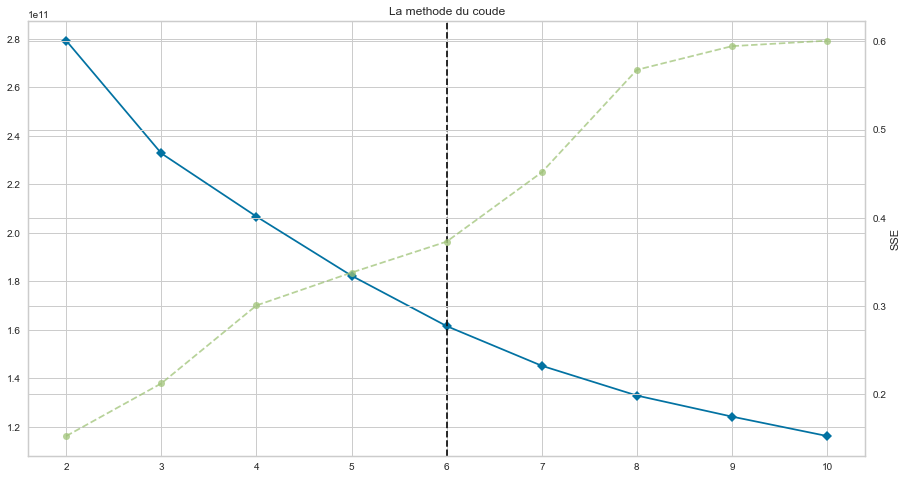

In [195]:
kmeans = KMeans(random_state=42)
coude = KElbowVisualizer(kmeans,k=(2,11))

plt.figure(figsize=(15,8))
coude.fit(dt)
plt.title('La methode du coude')
plt.xlabel('k')
plt.ylabel('SSE')

In [196]:
kmeans=KMeans(n_clusters=6, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(dt)


KMeans(n_clusters=6, random_state=0)

In [197]:
label=pd.DataFrame(kmeans.labels_)
label

,0
0,0
1,4
2,1
3,1
4,0
...,...
8944,0
8945,0
8946,0
8947,0


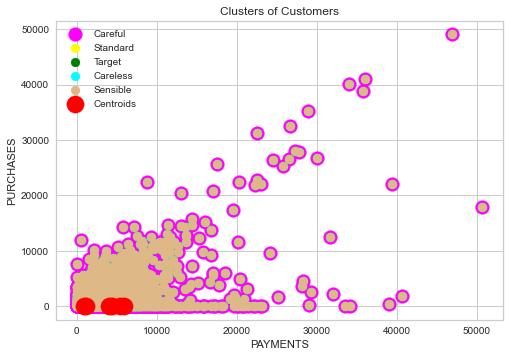

In [198]:

plt.scatter(dt["PAYMENTS"],          
            dt["PURCHASES"],s=190,c='magenta',label='Careful')
plt.scatter(dt["PAYMENTS"],
           dt["PURCHASES"],s=80,c='yellow',label='Standard')
plt.scatter(dt["PAYMENTS"],
           dt["PURCHASES"],s=80,c='green',label='Target')
plt.scatter(dt["PAYMENTS"], 
           dt["PURCHASES"],s=80,c='cyan',label='Careless')
plt.scatter(dt["PAYMENTS"], 
           dt["PURCHASES"],s=80,c='burlywood',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()